<a href="https://colab.research.google.com/github/VineetGargOfficials/Learning-PyTorch/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt



In [2]:
torch.manual_seed(42)

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [5]:
df = pd.read_csv('fashion-mnist_train.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


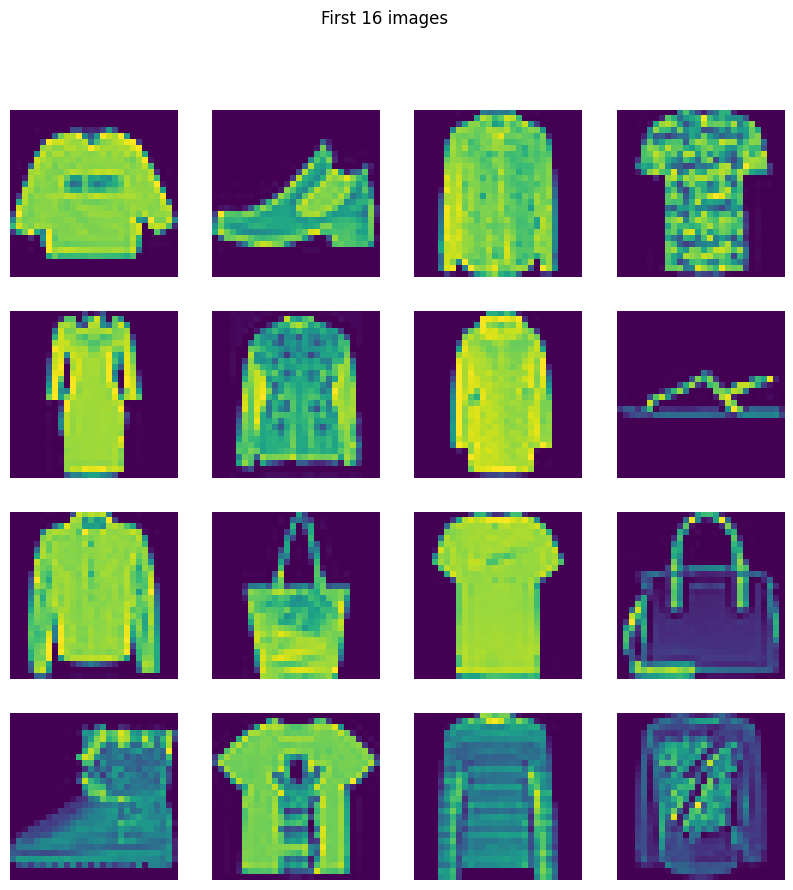

In [7]:
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("First 16 images")
for i, ax in enumerate(axes.flatten()):
    img = df.iloc[i, 1:].values.reshape(28, 28)
    ax.imshow(img)
    ax.axis('off')
plt.show()


In [8]:
X = df.iloc[:, 1:].values
Y = df.iloc[:, 0].values

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [10]:
X_train = X_train/255.0
X_test = X_test/255.0

In [25]:
class CustomDataset(Dataset):

  def __init__(self, features, labels):
    self.features = torch.tensor(features, dtype=torch.float32).reshape(-1, 1, 28, 28)
    self.labels = torch.tensor(labels, dtype=torch.long) # Changed dtype to torch.long

  def __len__(self):
    return len(self.features)

  def __getitem__(self, index):
    return self.features[index], self.labels[index]

In [26]:
train_dataset = CustomDataset(X_train, Y_train)
test_dataset = CustomDataset(X_test, Y_test)

In [27]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, pin_memory=True)

In [28]:
class MyCNN(nn.Module):

  def __init__(self, input_features):
    super().__init__()

    self.feature = nn.Sequential(
        nn.Conv2d(input_features, 32, kernel_size=3, padding='same'),
        nn.ReLU(),
        nn.BatchNorm2d(32),
        nn.MaxPool2d(kernel_size=2, stride=2),

        nn.Conv2d(32, 64, kernel_size=3, padding='same'),
        nn.ReLU(),
        nn.BatchNorm2d(64),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(64*7*7, 128),
        nn.ReLU(),
        nn.Dropout(0.4),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Dropout(0.4),
        nn.Linear(64, 10)

        )

  def forward(self, X):
    X = self.feature(X)
    X = self.classifier(X)
    return X


In [29]:
learning_rate = 0.01
epochs = 100

In [30]:
model = MyCNN(1).to(device)

loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=1e-4)


In [31]:

for epoch in range(epochs):
  total_epochs = 0
  for batch_features, batch_labels in train_loader:
    batch_features = batch_features.to(device)
    batch_labels = batch_labels.to(device)

    output = model(batch_features)
    loss = loss_function(output, batch_labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    total_epochs = total_epochs + loss.item()


  print(f'Epoch: {epoch + 1}, Loss: {total_epochs / len(train_loader)}')

Epoch: 1, Loss: 0.6395586923956871
Epoch: 2, Loss: 0.38420317418376604
Epoch: 3, Loss: 0.32317506304134924
Epoch: 4, Loss: 0.2933445354352395
Epoch: 5, Loss: 0.264161910119156
Epoch: 6, Loss: 0.24734376264363528
Epoch: 7, Loss: 0.23142562476421397
Epoch: 8, Loss: 0.2181179317968587
Epoch: 9, Loss: 0.20176156354447206
Epoch: 10, Loss: 0.19026359061524273
Epoch: 11, Loss: 0.1786893304946522
Epoch: 12, Loss: 0.17205003263863425
Epoch: 13, Loss: 0.1599962801989168
Epoch: 14, Loss: 0.15380970028943072
Epoch: 15, Loss: 0.14229934288654478
Epoch: 16, Loss: 0.13759521342938144
Epoch: 17, Loss: 0.12812709501137337
Epoch: 18, Loss: 0.12313909573325267
Epoch: 19, Loss: 0.11714190596761181
Epoch: 20, Loss: 0.11415843001753091
Epoch: 21, Loss: 0.10621624738986914
Epoch: 22, Loss: 0.10225385346492598
Epoch: 23, Loss: 0.09390751176917304
Epoch: 24, Loss: 0.09120613393893776
Epoch: 25, Loss: 0.0858437233218768
Epoch: 26, Loss: 0.08458431631602192
Epoch: 27, Loss: 0.0798497890610403
Epoch: 28, Loss: 0.

In [32]:

model.eval()


MyCNN(
  (feature): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (5): ReLU()
    (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3136, out_features=128, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): ReLU()
    (6): Dropout(p=0.4, inplace=False)
    (7): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [33]:
total=0
correct = 0

with torch.no_grad():
  for batch_features, batch_labels in test_loader:
    batch_features = batch_features.to(device)
    batch_labels = batch_labels.to(device)

    output = model(batch_features)
    _, predicted = torch.max(output.data, 1)

    total += batch_labels.size(0)
    correct += (predicted == batch_labels).sum().item()

print(f'Accuracy: {100 * correct / total}')

Accuracy: 92.175


In [34]:
total=0
correct = 0

with torch.no_grad():
  for batch_features, batch_labels in train_loader:
    batch_features = batch_features.to(device)
    batch_labels = batch_labels.to(device)

    output = model(batch_features)
    _, predicted = torch.max(output.data, 1)

    total += batch_labels.size(0)
    correct += (predicted == batch_labels).sum().item()

print(f'Accuracy: {100 * correct / total}')

Accuracy: 99.82291666666667
